<a href="https://colab.research.google.com/github/AvanthaPeiris/MDA/blob/main/MDA2024_ML_Practicalwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install and import required Libraries

In [ ]:
!pip install imbalanced-learn

In [1]:
# Base labraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data perprossing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE,SMOTENC
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score

# Models
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

In [2]:
# Data file loading
df = pd.read_csv("/content/sample_data/donor_data.csv")
df.head()

,TARGET_B,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,...,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
0,0,NaN,5,101,87.0,0,?,?,.,H,...,15.0,20.0,5.0,15.0,5.0,12.0,26.0,92.0,8.49,7.0
1,1,10.0,12,137,79.0,0,R,2,45,H,...,20.0,25.0,5.0,17.0,7.0,21.0,7.0,122.0,14.72,12.0
2,0,NaN,37,113,75.0,0,S,1,11,H,...,23.0,28.0,5.0,19.0,11.0,32.0,6.0,105.0,16.75,16.0
3,0,NaN,38,92,NaN,0,U,2,04,H,...,14.0,17.0,3.0,15.0,11.0,33.0,6.0,92.0,11.76,12.0
4,0,NaN,41,101,74.0,0,R,2,49,U,...,20.0,25.0,5.0,25.0,6.0,19.0,18.0,92.0,8.83,3.0


### EDA

In [ ]:
# EDA via ydata_profilin
!pip install ydata-profiling

import ydata_profiling as yd
from ydata_profiling import ProfileReport

profile=ProfileReport(df, title="Profiling Report")
profile.to_file("report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# EDA via sweetviz
#! pip install sweetviz

import sweetviz as sv

df_report=sv.analyze(df)
df_report.show_html('report.html')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 79.3 MB/s eta 0:00:00


                                             |          | [  0%]   00:00 -> (? left)

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19372 entries, 0 to 19371
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TARGET_B                     19372 non-null  int64  
 1   TARGET_D                     4843 non-null   float64
 2   CONTROL_NUMBER               19372 non-null  int64  
 3   MONTHS_SINCE_ORIGIN          19372 non-null  int64  
 4   DONOR_AGE                    14577 non-null  float64
 5   IN_HOUSE                     19372 non-null  int64  
 6   URBANICITY                   19372 non-null  object 
 7   SES                          19372 non-null  object 
 8   CLUSTER_CODE                 19372 non-null  object 
 9   HOME_OWNER                   19372 non-null  object 
 10  DONOR_GENDER                 19372 non-null  object 
 11  INCOME_GROUP                 14980 non-null  float64
 12  PUBLISHED_PHONE              19372 non-null  int64  
 13  OVERLAY_SOURCE  

In [5]:
df.describe()

,TARGET_B,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,INCOME_GROUP,PUBLISHED_PHONE,MOR_HIT_RATE,WEALTH_RATING,...,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
count,19372.000000,4843.000000,19372.000000,19372.000000,14577.000000,19372.000000,14980.000000,19372.000000,19372.000000,10562.000000,...,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000
mean,0.250000,15.624344,96546.225377,73.409973,58.919051,0.073198,3.907543,0.497729,3.361656,5.005397,...,11.587876,19.208808,7.620932,16.584199,5.367128,12.901869,18.191152,69.482088,12.858338,5.273591
std,0.433024,12.445137,55830.643871,41.255574,16.669382,0.260469,1.864796,0.500008,9.503481,2.815386,...,15.116893,16.101128,7.959786,11.977558,1.264205,4.642072,4.033065,37.568169,8.787758,4.607063
min,0.000000,1.000000,5.000000,5.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,5.000000,0.000000,0.000000,0.000000,2.000000,4.000000,15.000000,1.360000,0.000000
25%,0.000000,10.000000,48289.000000,29.000000,47.000000,0.000000,2.000000,0.000000,0.000000,3.000000,...,5.000000,12.000000,3.000000,10.000000,5.000000,11.000000,16.000000,33.000000,8.000000,2.000000
50%,0.000000,13.000000,96937.000000,65.000000,60.000000,0.000000,4.000000,0.000000,0.000000,5.000000,...,10.000000,16.000000,5.000000,15.000000,6.000000,12.000000,18.000000,65.000000,11.200000,4.000000
75%,0.250000,20.000000,145429.500000,113.000000,73.000000,0.000000,5.000000,1.000000,3.000000,7.000000,...,15.000000,21.000000,10.000000,20.000000,6.000000,13.000000,20.000000,105.000000,15.000000,8.000000
max,1.000000,200.000000,191779.000000,137.000000,87.000000,1.000000,7.000000,1.000000,241.000000,9.000000,...,997.000000,1000.000000,450.000000,450.000000,17.000000,64.000000,27.000000,260.000000,450.000000,41.000000


In [6]:
# Calculate correlation matrix
corr_matrix=df.corr()

# Mask the upper part of the Corr matrix
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot the heatmap with highlights
plt.figure(figsize=(15, 12))
sns.heatmap(
    corr_matrix,
    mask=mask,
    cmap='coolwarm',  # Color palette
    #annot=True,  # Display correlation coefficients
    fmt='.2f',  # Format for annotations
    vmin=-1, vmax=1,  # Range for correlation values
    cbar=True,  # Add color bar
    linewidths=0.5  # Line width between cells
)

plt.title('Correlation Matrix with Highlights', fontsize=16)
plt.show()

ValueError: could not convert string to float: '?'

In [ ]:
threshold = 0.6  # Corration threshold for features selection
high_corr = corr_matrix[(corr_matrix.abs() > threshold) & (corr_matrix <1)].stack()
print(high_corr)

### Data preprocessing - filling NA values

In [3]:
df.DONOR_AGE=df.DONOR_AGE.fillna(df.DONOR_AGE.mean())

In [4]:
df.INCOME_GROUP=df.INCOME_GROUP.fillna(df.INCOME_GROUP.median())

In [5]:
df.MONTHS_SINCE_LAST_PROM_RESP=df.MONTHS_SINCE_LAST_PROM_RESP.fillna(round(df['MONTHS_SINCE_LAST_PROM_RESP'].mean()))

In [6]:
df.WEALTH_RATING =df.WEALTH_RATING.fillna(df.WEALTH_RATING.median())

In [7]:
df.drop(df[df['URBANICITY'] == '?'].index, inplace=True)

In [8]:
df.drop(df[df['SES'] == '?'].index, inplace=True)

In [91]:
df.head()

,TARGET_B,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,...,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
1,1,10.0,12,137,79.000000,0,R,2,45,H,...,20.0,25.0,5.0,17.0,7,21,7,122,14.72,12
2,0,NaN,37,113,75.000000,0,S,1,11,H,...,23.0,28.0,5.0,19.0,11,32,6,105,16.75,16
3,0,NaN,38,92,58.919051,0,U,2,04,H,...,14.0,17.0,3.0,15.0,11,33,6,92,11.76,12
4,0,NaN,41,101,74.000000,0,R,2,49,U,...,20.0,25.0,5.0,25.0,6,19,18,92,8.83,3
5,0,NaN,52,101,63.000000,0,U,3,08,U,...,7.0,10.0,3.0,10.0,9,20,19,91,5.82,6


,count
TARGET_B,
0,14215
1,4703


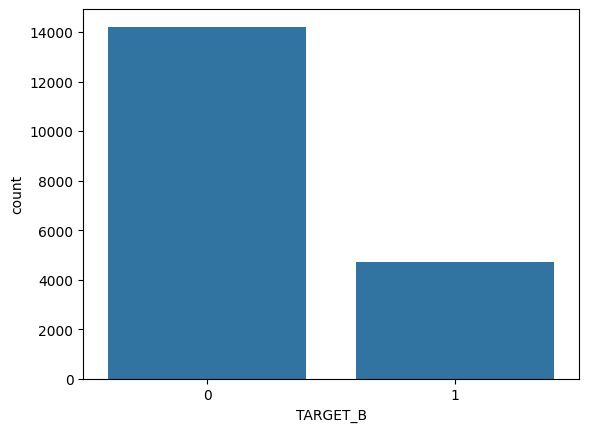

In [9]:
sns.countplot(x='TARGET_B', data=df)
df.value_counts('TARGET_B')

In [107]:
# Spliting the dataset for training and testing purpose

#df_x=df.drop(columns=['TARGET_D','TARGET_B'], axis=1)
df_x=df[["DONOR_AGE",	"DONOR_GENDER",	"INCOME_GROUP",	"IN_HOUSE",	"LAST_GIFT_AMT",	"LIFETIME_PROM",	"MEDIAN_HOUSEHOLD_INCOME",	"MONTHS_SINCE_FIRST_GIFT",	"MONTHS_SINCE_LAST_GIFT",	"PEP_STAR",	"PER_CAPITA_INCOME",	"RECENCY_STATUS_96NK",	"RECENT_RESPONSE_COUNT","URBANICITY"]]
df_y=df['TARGET_B']

train_df, test_df, train_label,test_label = train_test_split(df_x,df_y, test_size=0.2, random_state=42)

train_df.shape, test_df.shape

((15134, 14), (3784, 14))

In [108]:
# Calegorical feartures Encoding

# Dictionary to store LabelEncoders for each categorical column
encoders = {}

# List to store indices of categorical columns for SMOTENC
categorical_features = []

# Iterate through all columns in train_df
for i, column in enumerate(train_df.columns):  # Use enumerate to track index
    if train_df[column].dtype == 'object':  # Check for categorical columns
        encoders[column] = LabelEncoder()  # Create a LabelEncoder for this column
        train_df[column] = encoders[column].fit_transform(train_df[column])  # Transform column
        categorical_features.append(i)  # Store column index for SMOTENC

print("Categorical feature indices:", categorical_features)


Categorical feature indices: [1, 11, 13]


In [94]:
train_df.isna().sum()

,0
DONOR_AGE,0
DONOR_GENDER,0
INCOME_GROUP,0
IN_HOUSE,0
LAST_GIFT_AMT,0
LIFETIME_PROM,0
MEDIAN_HOUSEHOLD_INCOME,0
MONTHS_SINCE_FIRST_GIFT,0
MONTHS_SINCE_LAST_GIFT,0
PEP_STAR,0


In [9]:
# For CV
# Calegorical feartures Encoding for total dataframe

# Dictionary to store LabelEncoders for each categorical column
encoders = {}

# List to store indices of categorical columns for SMOTENC
categorical_features = []

# Iterate through all columns in train_df
for i, column in enumerate(df.columns):  # Use enumerate to track index
    if df[column].dtype == 'object':  # Check for categorical columns
        encoders[column] = LabelEncoder()  # Create a LabelEncoder for this column
        df[column] = encoders[column].fit_transform(df[column])  # Transform column
        categorical_features.append(i)  # Store column index for SMOTENC

print("Categorical feature indices:", categorical_features)


Categorical feature indices: [6, 7, 8, 9, 10, 13, 26]


In [10]:
# For CV
df.isna().sum()

,0
TARGET_B,0
TARGET_D,10758
CONTROL_NUMBER,0
MONTHS_SINCE_ORIGIN,0
DONOR_AGE,0
IN_HOUSE,0
URBANICITY,0
SES,0
CLUSTER_CODE,0
HOME_OWNER,0


In [11]:
# for CV
# Find NA rows and columns
def find_na_values(df):


    na_values = []
    for col in df.columns:
          for index, value in df[col].items():
              if pd.isna(value):  # Check for NA values
                  na_values.append((col, index, value))
    return na_values

na_values_found = find_na_values(df)

if na_values_found:
    print("NA values found:")
    for col, index, value in na_values_found:
        print(f"  Column: {col}, Row: {index}, Value: {value}")
else:
    print("No NA values found.")

NA values found:
  Column: TARGET_D, Row: 2, Value: nan
  Column: TARGET_D, Row: 3, Value: nan
  Column: TARGET_D, Row: 4, Value: nan
  Column: TARGET_D, Row: 5, Value: nan
  Column: TARGET_D, Row: 6, Value: nan
  Column: TARGET_D, Row: 8, Value: nan
  Column: TARGET_D, Row: 10, Value: nan
  Column: TARGET_D, Row: 11, Value: nan
  Column: TARGET_D, Row: 12, Value: nan
  Column: TARGET_D, Row: 13, Value: nan
  Column: TARGET_D, Row: 17, Value: nan
  Column: TARGET_D, Row: 19, Value: nan
  Column: TARGET_D, Row: 21, Value: nan
  Column: TARGET_D, Row: 22, Value: nan
  Column: TARGET_D, Row: 27, Value: nan
  Column: TARGET_D, Row: 29, Value: nan
  Column: TARGET_D, Row: 30, Value: nan
  Column: TARGET_D, Row: 31, Value: nan
  Column: TARGET_D, Row: 32, Value: nan
  Column: TARGET_D, Row: 34, Value: nan
  Column: TARGET_D, Row: 35, Value: nan
  Column: TARGET_D, Row: 38, Value: nan
  Column: TARGET_D, Row: 40, Value: nan
  Column: TARGET_D, Row: 44, Value: nan
  Column: TARGET_D, Row: 46, 

In [ ]:
# For CV
df=df.drop(columns=['TARGET_D'], axis=1).dropna()
df.shape

In [15]:
# For CV
x=df.drop(columns=['TARGET_B'], axis=1)
y=df['TARGET_B']

In [ ]:
# Unique values in the Categorical features

unique_values_df = train_df[['URBANICITY','SES','CLUSTER_CODE','HOME_OWNER','DONOR_GENDER','OVERLAY_SOURCE','RECENCY_STATUS_96NK']].apply(pd.Series.unique)
print(unique_values_df)

In [109]:
# Apply SMOTENC for oversampling to get similar number of target counts(1 donor/0 not a donor)
# SMOTENC Synthetic Minority Oversampling Technique for Nominal and Continuous variables

smote_nc = SMOTENC(categorical_features=categorical_features, random_state=42)
X_resampled, y_resampled = smote_nc.fit_resample(train_df, train_label)


In [16]:
# For CV
# Apply SMOTENC for oversampling to get similar number of target counts(1 donor/0 not a donor)
# SMOTENC Synthetic Minority Oversampling Technique for Nominal and Continuous variables

smote_nc = SMOTENC(categorical_features=categorical_features, random_state=42)
X_resampled, y_resampled = smote_nc.fit_resample(x, y)


In [17]:
print(X_resampled.shape, y_resampled.shape)
y_resampled.value_counts()

(21514, 48) (21514,)


,count
TARGET_B,
1,10757
0,10757


In [111]:
# Reassign the datasets

train_df=X_resampled
train_label=y_resampled

In [112]:
# Encoding of categorical features in the Test dataset using the same encorder

for column in encoders:
    test_df[column] = encoders[column].transform(test_df[column])  # Use stored encoders

In [113]:
# Logistic Regression
# Scikit-learn model is more into ML approach

# 1. Train the model
model = LogisticRegression()  # You can adjust hyperparameters here (e.g., penalty, C)
model.fit(train_df,train_label )

# 2. Make predictions
y_pred_lr = model.predict(test_df)

# 3. Evaluate the model
# Calculate test accuracy
accuracy = accuracy_score(test_label, y_pred_lr)
print(f"\nAccuracy: {accuracy}")

# Generate classification report
print("Classification Report:")
print(classification_report(test_label, y_pred_lr))

# Generate confusion matrix
print("\nConfusion Matrix:")
cm=confusion_matrix(test_label, y_pred_lr)
df_cm=pd.DataFrame(cm, index=(0,1), columns=(0,1))
print(df_cm)


# 4. Access coefficients and intercept
print("\nCoefficients:")
print(model.coef_)
print("\nIntercept:")
print(model.intercept_)


Accuracy: 0.5769027484143763
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.60      0.68      2840
           1       0.30      0.51      0.37       944

    accuracy                           0.58      3784
   macro avg       0.54      0.55      0.53      3784
weighted avg       0.66      0.58      0.60      3784


Confusion Matrix:
      0     1
0  1705  1135
1   466   478

Coefficients:
[[ 7.84005415e-03 -6.16575647e-03  7.84454518e-03 -2.72887050e-03
  -1.78761676e-02  3.06035154e-03  8.59495634e-04  1.62286467e-03
  -4.78852491e-02 -4.53875967e-03  5.10230114e-06 -1.57610275e-02
   6.90931785e-03 -4.89988939e-03]]

Intercept:
[-9.88750968e-05]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [114]:
# Random forest

# 1. Train the model
rf=RandomForestClassifier(n_estimators=200, random_state=200)
rf.fit(train_df, train_label)

# 2. Make predictions
y_pred_rf=rf.predict(test_df)

# 3. Evaluate the model
# Calculate test accuracy
accuracy = accuracy_score(test_label, y_pred_rf)
print(f"\nAccuracy: {accuracy}")
precision = precision_score(test_label, y_pred_rf)
print(f"\nPrecision: {precision}")
recall = recall_score(test_label, y_pred_rf)
print(f"\nRecall: {recall}")
f1 = f1_score(test_label, y_pred_rf)
print(f"\nf1: {f1}")

# Generate classification report
print("\nClassification Report:")
print(classification_report(test_label, y_pred_rf))

# Generate confusion matrix
print("\nConfusion Matrix:")
cm=confusion_matrix(test_label, y_pred_rf)
df_cm=pd.DataFrame(cm, index=(0,1), columns=(0,1))
print(df_cm)


Accuracy: 0.7130021141649049

Precision: 0.35269709543568467

Recall: 0.18008474576271186

f1: 0.23842917251051893

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.89      0.82      2840
           1       0.35      0.18      0.24       944

    accuracy                           0.71      3784
   macro avg       0.56      0.54      0.53      3784
weighted avg       0.66      0.71      0.68      3784


Confusion Matrix:
      0    1
0  2528  312
1   774  170


In [78]:
from sklearn.model_selection import GridSearchCV

# Define a smaller parameter grid for exhaustive search
param_grid = {
    'n_estimators': [50,100, 200],
    'max_depth': [10, 20,30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ["auto", "sqrt", "log2", None],
    'class_weight': [None, "balanced", "balanced_subsample"]
}

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Use GridSearchCV
grid_search = GridSearchCV(
    rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2
)

# Fit on training data
grid_search.fit(train_df, train_label)

# Print best parameters
print("Best Hyperparameters:", grid_search.best_params_)

# Train the best model
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(test_df)

# Evaluate the optimized model
accuracy = accuracy_score(test_label, y_pred_rf)
print(f"\nOptimized Accuracy: {accuracy}")

print("\nClassification Report:")
print(classification_report(test_label, y_pred_rf))

print("\nConfusion Matrix:")
cm = confusion_matrix(test_label, y_pred_rf)
df_cm = pd.DataFrame(cm, index=(0, 1), columns=(0, 1))
print(df_cm)


Fitting 5 folds for each of 432 candidates, totalling 2160 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


KeyboardInterrupt: 

In [39]:
# Random forest with cross validation

# 1. Model creation
rfc=RandomForestClassifier(n_estimators=200, random_state=42)


# 2. Perform cross-validation
cv_scores = cross_val_score(rfc,train_df, train_label , cv=5, scoring='accuracy')

# Print cross-validation scores and mean accuracy
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean():.4f}")

# 3. Model Training
rfc.fit(train_df, train_label)

# 4. Make predictions
y_pred_rfc=rfc.predict(test_df)

# 5. Evaluate the model
# Calculate test accuracy
accuracy = accuracy_score(test_label, y_pred_rfc)
print(f"\nAccuracy: {accuracy}")

# Generate classification report
print("Classification Report:")
print(classification_report(test_label, y_pred_rfc))

# Generate confusion matrix
print("\nConfusion Matrix:")
cm=confusion_matrix(test_label, y_pred_rfc)
df_cm=pd.DataFrame(cm, index=(0,1), columns=(0,1))
print(df_cm)

Cross-validation scores: [0.62989011 0.70527473 0.84175824 0.82879121 0.83340659]
Mean cross-validation accuracy: 0.7678

Accuracy: 0.6672832980972516
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.81      0.78      2840
           1       0.30      0.24      0.27       944

    accuracy                           0.67      3784
   macro avg       0.53      0.53      0.53      3784
weighted avg       0.65      0.67      0.66      3784


Confusion Matrix:
      0    1
0  2294  546
1   713  231


In [19]:
# Random forest with cross validation

# 1. Model creation
rfc=RandomForestClassifier(n_estimators=200, random_state=42)


# 2. Perform cross-validation
cv_scores = cross_val_score(rfc,X_resampled,y_resampled, cv=5, scoring='accuracy')

# Print cross-validation scores and mean accuracy
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean():.4f}")

# 2. Make predictions
y_pred_rf=rfc.predict(X_resampled)

# 3. Evaluate the model
# Calculate test accuracy
accuracy = accuracy_score(y_resampled, y_pred_rf)
print(f"\nAccuracy: {accuracy}")
precision = precision_score(y_resampled, y_pred_rf)
print(f"\nPrecision: {precision}")
recall = recall_score(y_resampled, y_pred_rf)
print(f"\nRecall: {recall}")
f1 = f1_score(y_resampled, y_pred_rf)
print(f"\nf1: {f1}")

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_resampled, y_pred_rf))

# Generate confusion matrix
print("\nConfusion Matrix:")
cm=confusion_matrix(y_resampled, y_pred_rf)
df_cm=pd.DataFrame(cm, index=(0,1), columns=(0,1))
print(df_cm)

Cross-validation scores: [0.20869161 0.38275622 0.88984429 0.78735766 0.495351  ]
Mean cross-validation accuracy: 0.5528


NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [117]:
# Decision Tree

# 1. Train the model
dt = DecisionTreeClassifier(random_state=42, max_depth=30)
dt.fit(train_df, train_label)

# 2. Make predictions
y_pred_dt = dt.predict(test_df)

# 3. Evaluate the model
# Calculate test accuracy
accuracy = accuracy_score(test_label, y_pred_dt)
print(f"\nAccuracy: {accuracy}")
accuracy = accuracy_score(test_label, y_pred_dt)
print(f"\nAccuracy: {accuracy}")
precision = precision_score(test_label, y_pred_dt)
print(f"\nPrecision: {precision}")
recall = recall_score(test_label, y_pred_dt)
print(f"\nRecall: {recall}")
f1 = f1_score(test_label, y_pred_dt)
print(f"\nf1: {f1}")

# Generate classification report
print("\n
Classification Report:")
print(classification_report(test_label, y_pred_dt))

# Generate confusion matrix
print("\nConfusion Matrix:")
cm=confusion_matrix(test_label, y_pred_dt)
df_cm=pd.DataFrame(cm, index=(0,1), columns=(0,1))
print(df_cm)



Accuracy: 0.625

Accuracy: 0.625

Precision: 0.2877569258266309

Recall: 0.3411016949152542

f1: 0.3121667474551624

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.72      0.74      2840
           1       0.29      0.34      0.31       944

    accuracy                           0.62      3784
   macro avg       0.53      0.53      0.53      3784
weighted avg       0.65      0.62      0.63      3784


Confusion Matrix:
      0    1
0  2043  797
1   622  322


In [21]:
# Decision Tree with cross validation

# 1. Model creation
dtc = DecisionTreeClassifier(random_state=42)

# 2. Perform cross-validation
cv_scores = cross_val_score(dtc, train_df, train_label, cv=5, scoring='accuracy')

# Print cross-validation scores and mean accuracy
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean():.4f}")

# 3. Model Training
dtc.fit(train_df, train_label)

# 4. Make predictions
y_pred_dtc = dtc.predict(test_df)

# 5. Evaluate the model
# Calculate test accuracy
accuracy = accuracy_score(test_label, y_pred_dtc)
print(f"\nAccuracy: {accuracy}")

# Generate classification report
print("Classification Report:")
print(classification_report(test_label, y_pred_dtc))

# Generate confusion matrix
print("\nConfusion Matrix:")
cm=confusion_matrix(test_label, y_pred_dtc)
df_cm=pd.DataFrame(cm, index=(0,1), columns=(0,1))
print(df_cm)


Cross-validation scores: [0.53054945 0.64285714 0.79032967 0.77912088 0.79142857]
Mean cross-validation accuracy: 0.7069

Accuracy: 0.611522198731501
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.70      0.73      2840
           1       0.28      0.35      0.31       944

    accuracy                           0.61      3784
   macro avg       0.52      0.52      0.52      3784
weighted avg       0.64      0.61      0.62      3784


Confusion Matrix:
      0    1
0  1987  853
1   617  327


In [41]:
# Gradient Boosting

# 1. Train the model
gb = GradientBoostingClassifier(random_state=42)
gb.fit(train_df, train_label)

# 2. Make predictions
y_pred_gb = gb.predict(test_df)

# 3. Evaluate the model
# Calculate test accuracy
accuracy = accuracy_score(test_label, y_pred_gb)
print(f"\nAccuracy: {accuracy}")

# Generate classification report
print("Classification Report:")
print(classification_report(test_label, y_pred_gb))

# Generate confusion matrix
print("\nConfusion Matrix:")
cm=confusion_matrix(test_label, y_pred_gb)
df_cm=pd.DataFrame(cm, index=(0,1), columns=(0,1))
print(df_cm)


Accuracy: 0.6773255813953488
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.79      0.79      2840
           1       0.35      0.34      0.34       944

    accuracy                           0.68      3784
   macro avg       0.56      0.56      0.56      3784
weighted avg       0.67      0.68      0.68      3784


Confusion Matrix:
      0    1
0  2246  594
1   627  317


In [42]:
# Ada Boost

# 1. Train the model
ab = AdaBoostClassifier(random_state=42)
ab.fit(train_df, train_label)

# 2. Make predictions
y_pred_ab = ab.predict(test_df)

# 3. Evaluate the model
# Calculate test accuracy
accuracy = accuracy_score(test_label, y_pred_ab)
print(f"\nAccuracy: {accuracy}")

# Generate classification report
print("Classification Report:")
print(classification_report(test_label, y_pred_ab))

# Generate confusion matrix
print("\nConfusion Matrix:")
cm=confusion_matrix(test_label, y_pred_ab)
df_cm=pd.DataFrame(cm, index=(0,1), columns=(0,1))
print(df_cm)


Accuracy: 0.6271141649048626
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.68      0.73      2840
           1       0.33      0.47      0.38       944

    accuracy                           0.63      3784
   macro avg       0.56      0.57      0.56      3784
weighted avg       0.68      0.63      0.65      3784


Confusion Matrix:
      0    1
0  1934  906
1   505  439


In [43]:
# Support Vector classifier

# 1. Train the model
svm = SVC(random_state=42)
svm.fit(train_df, train_label)

# 2. Make predictions
y_pred_svm = svm.predict(test_df)

# 3. Evaluate the model
# Calculate test accuracy
accuracy = accuracy_score(test_label, y_pred_svm)
print(f"\nAccuracy: {accuracy}")

# Generate classification report
print("Classification Report:")
print(classification_report(test_label, y_pred_svm))

# Generate confusion matrix
print("\nConfusion Matrix:")
cm=confusion_matrix(test_label, y_pred_svm)
df_cm=pd.DataFrame(cm, index=(0,1), columns=(0,1))
print(df_cm)


Accuracy: 0.635306553911205
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.69      0.74      2840
           1       0.34      0.48      0.40       944

    accuracy                           0.64      3784
   macro avg       0.57      0.58      0.57      3784
weighted avg       0.68      0.64      0.65      3784


Confusion Matrix:
      0    1
0  1947  893
1   487  457


In [44]:

def find_negative_values(df):
    """
    Finds and lists the presence of negative values in a pandas DataFrame.

    Args:
        df: The pandas DataFrame.

    Returns:
        A list of tuples, where each tuple contains (column_name, row_index, negative_value).
    """

    negative_values = []
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):  # Check if the column is numeric
            for index, value in df[col].items():
                if isinstance(value, (int, float)) and value < 0:  # Check for negative numeric values
                    negative_values.append((col, index, value))
    return negative_values

negative_values_found = find_negative_values(train_df)

if negative_values_found:
    print("Negative values found:")
    for col, index, value in negative_values_found:
        print(f"  Column: {col}, Row: {index}, Value: {value}")
else:
    print("No negative values found.")

No negative values found.


In [26]:
test_df[test_df['MONTHS_SINCE_LAST_PROM_RESP'] < 0]

,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,DONOR_GENDER,INCOME_GROUP,...,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
10391,104133,137,59.0,0,1,1,48,1,0,2.0,...,14.0,17.0,3.0,14.0,5,12,20,116,10.8,10
5214,52224,77,45.0,0,3,2,40,0,1,7.0,...,25.0,30.0,5.0,30.0,6,14,18,69,17.5,2


In [46]:
# Muiltinomial Naive Bayes

# 1. Train the model
mnb=MultinomialNB()
#train_df.drop(train_df[train_df['MONTHS_SINCE_LAST_PROM_RESP'] < 0].index, inplace=True)
##labeltodelete=[620,1062,7844,12279,12546,14772,15449,16148,16876,20336,20400]
#train_label.drop(labeltodelete, inplace=True)
mnb.fit(train_df, train_label)

#test_df.drop(test_df[test_df['MONTHS_SINCE_LAST_PROM_RESP'] < 0].index, inplace=True)
#testlabeltodelete=[10391,5214]
#test_label.drop(testlabeltodelete, inplace=True)

# 2. Make predictions
y_pred_mnb = mnb.predict(test_df)

# 3. Evaluate the model
# Calculate test accuracy
accuracy = accuracy_score(test_label, y_pred_mnb)
print(f"\nAccuracy: {accuracy}")

# Generate classification report
print("Classification Report:")
print(classification_report(test_label, y_pred_mnb))

# Generate confusion matrix
print("\nConfusion Matrix:")
cm=confusion_matrix(test_label, y_pred_mnb)
df_cm=pd.DataFrame(cm, index=(0,1), columns=(0,1))
print(df_cm)


Accuracy: 0.6139006342494715
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.66      0.72      2840
           1       0.32      0.48      0.38       944

    accuracy                           0.61      3784
   macro avg       0.56      0.57      0.55      3784
weighted avg       0.67      0.61      0.64      3784


Confusion Matrix:
      0    1
0  1867  973
1   488  456
